# NY Housing prices and amenities Analysis

*#
Project Title: Which housing factor is most valuable to homebuyers in New York City?

Team Members: Alana Adams, Maria Gutierrez Valencia, Lincoln Martin, Sharada Muthusubramanian

Project Description/Outline: 

Research Questions to Answer: 
Hypothesis: Null (H0) hypothesis - number of bedrooms increases the price of the house will not be change 
Alternative HYpothesis (H1) - as the number of bedrooms increase the price of the house will have the tendency to increase.

1. Does area of house or number of bedrooms matter more to homebuyers?
2. Is a furnished home more preferred than an unfurnished home? 
3. Does the main road status matter to homebuyers?
4. Does number of parking spaces have any correlation to housing price?
5. Do New Yorkers prefer houses with basements over guestrooms?
6. Can we predict housing price based on area of the house?
7. Do the number of bathrooms correlate with the number of bedrooms?
8. Do we see a relationship between price and number of stories in a house?
9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
#%matplotlib notebook
# File to Load 
ny_housing = Path("Resources/Housing.csv")

# Read housing Data File and store into Pandas DataFrames
ny_housing_df = pd.read_csv(ny_housing)
ny_housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. Does area of house or number of bedrooms matter more to homebuyers?

In [2]:
# Establish the bins 
pr_bins = [0, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000,5000000, 6000000,8000000,14000000]
price_labels = ["0 - 2M", "2M - 2.5M", "2.5M - 3M", "3M - 3.5M", "3.5M - 4M", "4M - 4.5M","4.5M - 5M","5M - 6M","6M - 8M","8M - 14M"]

In [3]:
# Establish the bins 
ar_bins = [0,3000, 5000, 7500,9000,12000,15000]
area_labels = ["0 - 3000", "3000 - 5000", "5000 - 7500", "7500 - 9000","9000 - 12000","12000 - 15000"]

In [4]:
ny_housing_copy_df = ny_housing_df.copy()
ny_housing_copy_df = ny_housing_copy_df.reset_index(drop=True)
ny_housing_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# Use `pd.cut` to categorize area of the house based on the bins.
ny_housing_copy_df["price_bin"] =  pd.cut( ny_housing_copy_df["price"], pr_bins,labels= price_labels, include_lowest=True, ordered=False)

ny_housing_copy_df["area_bin"] =  pd.cut( ny_housing_copy_df["area"], ar_bins,labels= area_labels, include_lowest=True, ordered=False)

ny_housing_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_bin,area_bin
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8M - 14M,5000 - 7500
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8M - 14M,7500 - 9000
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,8M - 14M,9000 - 12000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8M - 14M,5000 - 7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8M - 14M,5000 - 7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0 - 2M,0 - 3000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0 - 2M,0 - 3000
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0 - 2M,3000 - 5000
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0 - 2M,0 - 3000


C:\Users\shara\AppData\Local\Temp\ipykernel_27324\4272982380.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  line_plot_df1 = ny_housing_copy_df.groupby('area_bin').median()["price"]


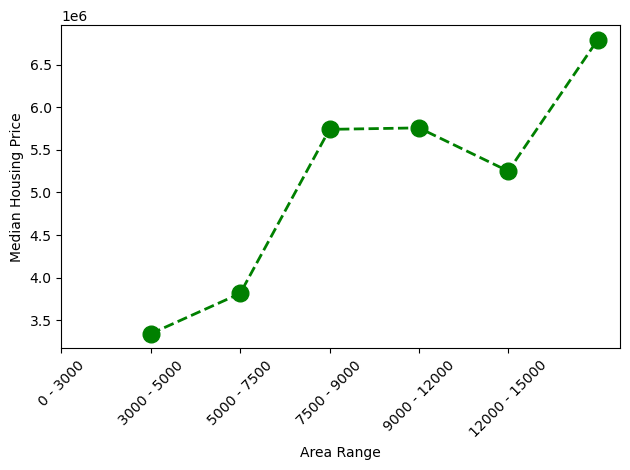

In [6]:
# Plot line graph to measure the preference of the home buyer area VS. home buyer bedrooms

line_plot_df1 = ny_housing_copy_df.groupby('area_bin').median()["price"]
line_plot_df1 = line_plot_df1.reset_index(drop=False)
line_plot_df1


#plt.line(x_axis, y_axis,  color ="green", align='center', alpha=0.75)

x_axis = line_plot_df1["area_bin"]
y_axis = line_plot_df1["price"]

plt.plot(x_axis, y_axis, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
y_pos = np.arange(len(line_plot_df1["area_bin"]))-1
tick_val =  line_plot_df1["area_bin"]

plt.xticks(y_pos,tick_val, rotation = 45)
plt.xlabel("Area Range")
plt.ylabel("Median Housing Price")
plt.tight_layout()
plt.show()

# What matters most to NY house Market 

###Based on two data output of the two metrics, It seems Area of the house matters more than the number of bedrooms.  We can observe that the area of the house has upward trend with the increase in area of the house the price increases.  Where as, with the increase in the # of bedrooms the price drops after a certain point. Leading us believe area matters most


C:\Users\shara\AppData\Local\Temp\ipykernel_27324\1181956566.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  line_plot_df2 = ny_housing_copy_df.groupby('bedrooms').median()["price"]


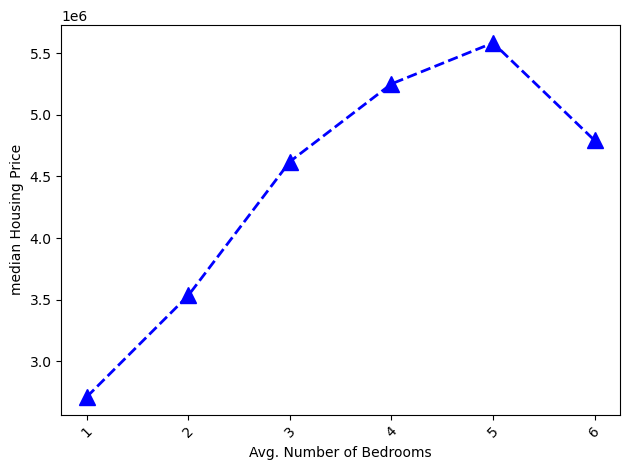

In [7]:
# /*******************************************************************************************/

line_plot_df2 = ny_housing_copy_df.groupby('bedrooms').median()["price"]
line_plot_df2 = line_plot_df2.reset_index(drop=False)
line_plot_df2

x_axis = line_plot_df2["bedrooms"]
y_axis = line_plot_df2["price"]
y_pos = np.arange(len(line_plot_df2["bedrooms"]))+1
tick_val =  line_plot_df2["bedrooms"]

plt.plot(x_axis, y_axis, color='blue', marker='^', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(y_pos, tick_val, rotation = 45)
plt.xlabel('Avg. Number of Bedrooms')
plt.ylabel("median Housing Price")
plt.tight_layout()

plt.show()

## 2. Is a furnished home more preferred than an unfurnished home? 

In [8]:
#Group the housing price by  furnishing status and get mean, median, mode, std deviation and variance by the furnishing status
ny_hsng_furstat_df = ny_housing_copy_df.groupby('furnishingstatus').median()["price"]
ny_hsng_furstat_df = ny_hsng_furstat_df.reset_index(drop=False)
ny_hsng_furstat_df['price'] = ny_hsng_furstat_df['price']/1000000
ny_hsng_furstat_df.describe()


C:\Users\shara\AppData\Local\Temp\ipykernel_27324\4023018739.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ny_hsng_furstat_df = ny_housing_copy_df.groupby('furnishingstatus').median()["price"]


,price
count,3.000000
mean,4.363333
std,0.844605
min,3.430000
25%,4.007500
50%,4.585000
75%,4.830000
max,5.075000


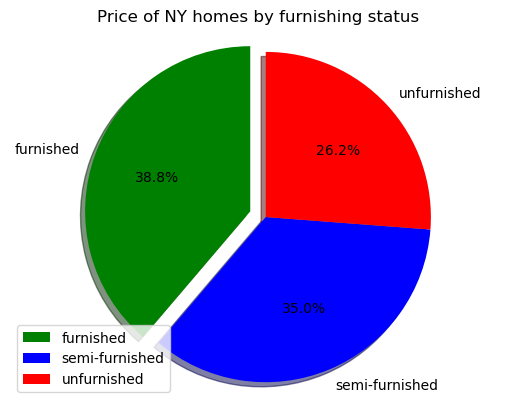

<Figure size 640x480 with 0 Axes>

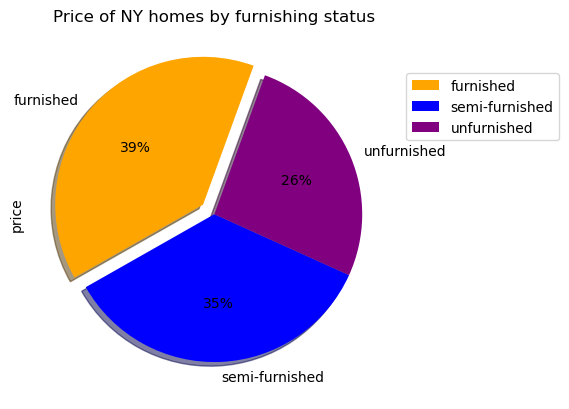

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a pie plot showing the distribution of furnishing status using pyplot
pie_plot_df = ny_hsng_furstat_df

plt.title("Price of NY homes by furnishing status")
colors = ["green", "blue","red"]
labels = pie_plot_df["furnishingstatus"]
explode = (0.1,0,0)

plt.pie(pie_plot_df["price"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(loc="lower left")
plt.axis("equal")
plt.show()
#save the plot as figure
plt.savefig("output_data/Fig1.png")
#*****************************************************************************************
# Generate a pie plot showing the distribution of furnishing status using Pandas

colors = ["orange", "blue", "purple"]
labels = pie_plot_df["furnishingstatus"]
explode = (0.1,0,0)

pie_plt_a = pie_plot_df.plot(kind='pie', y="price", explode = explode, colors = colors, labels = labels,legend=True, title='Price of NY homes by furnishing status', autopct='%1.0f%%', startangle = 70, shadow = True)
pie_plt_a.legend(bbox_to_anchor=(1, .9), loc='upper left')
plt.show()
#save the plot as figure
plt.savefig("output_data/Fig2.png")

## 2. Furnished homes are preferred over semi or unfurnished home. 
As we can see from the price relationship between Furnished vs. Unfurnished Furnished homes have 37.8% higher price than unfurnished.  So we can conclude that furnished homes are more preferred as the home owners are willing pay higer price for furnished homes.

## 3. Does the main road status matter to homebuyers?

In [10]:
#Group the housing price by Mainroad and get mean

In [11]:
# plot a pie chrt to show the preferance

##  4. Does number of parking spaces have any correlation to housing price?

In [12]:
#calculate the correlation coefficent parking spaces in realtion to housing price

# calculate slope, intercepts, pvalue, rvalue 


In [13]:
# Plot scatter plot and draw the linear regression

## 5. Do New Yorkers pay more value with houses with basements over guestrooms?

In [14]:
#Calculate the number of houses with basement and with guestrooms and with both basement & guestrooms

#Calculate the sum housing price with basement and with guestrooms and with both basement & guestrooms

In [15]:
#Calculate the average housing price for houses with basement and houses with guestrooms

#plot a barchart

## 6. Can we predict housing price based on area of the house?

In [16]:
#calculate the correlation coefficent area in realtion to housing price

# calculate slope, intercepts, pvalue, rvalue the best fit line to calculate the housing price

In [17]:
#save the output to a csv file

##  7. Do the number of bathrooms correlate with the number of bedrooms?

In [18]:
#calculate the correlation coefficent between bathrooms and number of bedrooms inrelation to pricing

##  8. Do we see a relationship between price and number of stories in a house?

C:\Users\shara\AppData\Local\Temp\ipykernel_27324\3525161928.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bar_plot_df3 = ny_housing_copy_df.groupby('stories').median()["price"]


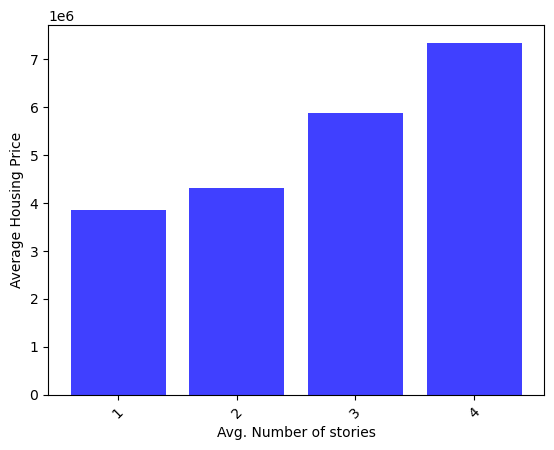

In [19]:
#bar plot number of stories to price
bar_plot_df3 = ny_housing_copy_df.groupby('stories').median()["price"]
bar_plot_df3 = bar_plot_df3.reset_index(drop=False)
bar_plot_df3

x_axis = bar_plot_df3["stories"]
y_axis = bar_plot_df3["price"]
y_pos = np.arange(len(bar_plot_df3["stories"]))+1
tick_val =  bar_plot_df3["stories"]

plt.bar(x_axis, y_axis,  color ="blue", align='center', alpha=0.75)
plt.xticks(y_pos, tick_val, rotation = 45)
plt.xlabel('Avg. Number of stories')
plt.ylabel("Average Housing Price")

plt.show()

<Axes: title={'center': 'price'}, xlabel='stories'>

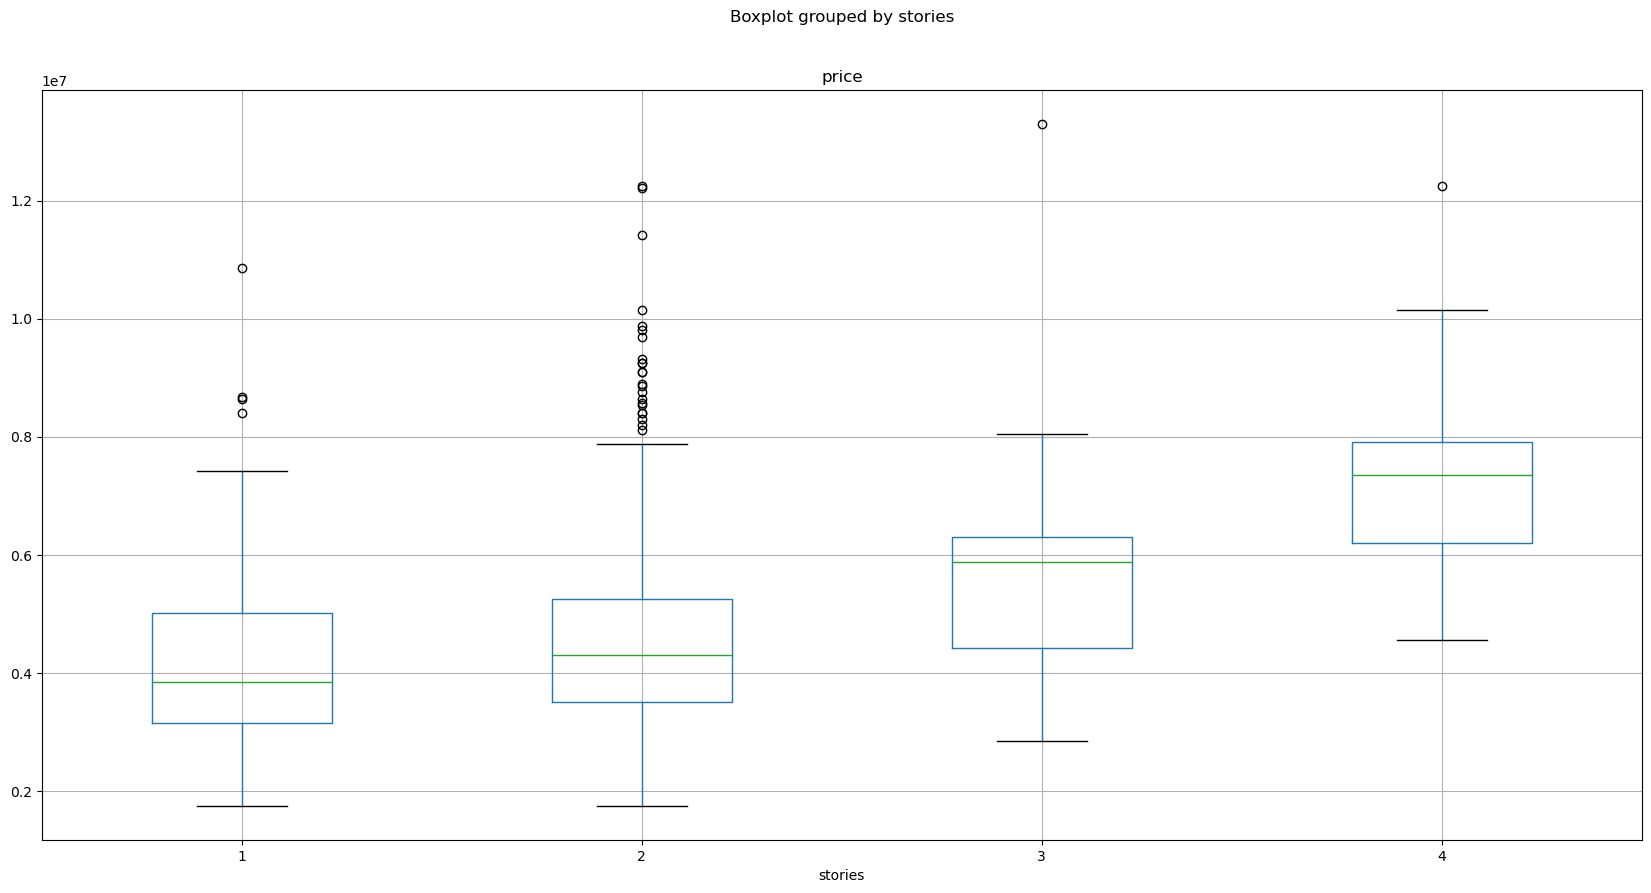

In [20]:
ny_housing_copy_df.boxplot("price", by="stories", figsize=(20, 10))


In [21]:
# Extract individual groups
group0 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 1]["price"]
group1 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 2]["price"]
group2 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 3]["price"]
group3 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 4]["price"]

st.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=41.78230944700161, pvalue=2.6832459713031025e-24)

In [22]:
st.f_oneway(group0, group1)

F_onewayResult(statistic=14.161926742395657, pvalue=0.00018927810499715325)

In [23]:
st.f_oneway(group2, group3)

F_onewayResult(statistic=17.41966596219819, pvalue=7.726162647959343e-05)

##  Answer for 8: 
The bar chart shows that, with the increase in number of stories have higher house price. However, ANOVA p_value of 2.6832459713031025 × 10-24 shows that relationship between price and stories is not statistically significant. Even when checked for two groups results are pretty similar.


##  9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?

In [24]:
# summerize the number of rooms and store it in a new column
ny_rooms_copy_df = ny_housing_df.copy()
ny_rooms_copy_df = ny_rooms_copy_df.reset_index(drop=True)
#Converting boolean to number
ny_rooms_copy_df["guest_rm"] = ny_rooms_copy_df["guestroom"].apply(lambda x: 1 if x == 'yes' else 0)
ny_rooms_copy_df["basemnt_cnt"] = ny_rooms_copy_df["basement"].apply(lambda y: 1 if y == 'yes' else 0)

ny_rooms_copy_df["Total_number_of_rms"] = ny_rooms_copy_df["basemnt_cnt"]+ny_rooms_copy_df["guest_rm"]+ny_rooms_copy_df["bedrooms"]+ny_rooms_copy_df["bathrooms"]
ny_rooms_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,guest_rm,basemnt_cnt,Total_number_of_rms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,6
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,7
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0,1,4
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0,0,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,4


In [25]:
#calculate average price per room and average price per sqrft
average_price_per_room = ny_rooms_copy_df["price"].sum()/ny_rooms_copy_df["Total_number_of_rms"].sum()
average_price_per_sqrt = ny_rooms_copy_df["price"].sum()/ny_rooms_copy_df["area"].sum()
print(average_price_per_room)
print(average_price_per_sqrt)

997261.9731285989
925.4812231367862


Ttest_indResult(statistic=-55.35538329764364, pvalue=1.170698068903962e-225)

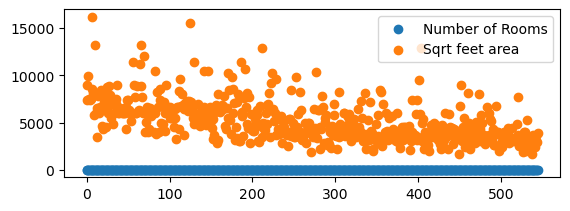

In [26]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(ny_rooms_copy_df["Total_number_of_rms"])), ny_rooms_copy_df["Total_number_of_rms"], label="Number of Rooms")
plt.scatter(range(len(ny_rooms_copy_df["area"])), ny_rooms_copy_df["area"], label="Sqrt feet area")
plt.legend()

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(ny_rooms_copy_df["Total_number_of_rms"], ny_rooms_copy_df["area"], equal_var=False)

##  10. General Data Analysis of NY housing market

In [27]:
# create a dataframe of homes that are prices above 5 million dollar  
exp_ny_housing_df = ny_housing_copy_df[ny_housing_copy_df["price"] >= 5000000 ]
exp_ny_housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_bin,area_bin
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8M - 14M,5000 - 7500
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8M - 14M,7500 - 9000
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,8M - 14M,9000 - 12000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8M - 14M,5000 - 7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8M - 14M,5000 - 7500


C:\Users\shara\AppData\Local\Temp\ipykernel_27324\4017754049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatt_plot_exp_hsng = exp_ny_housing_df.groupby(["area"]).mean()["price"]


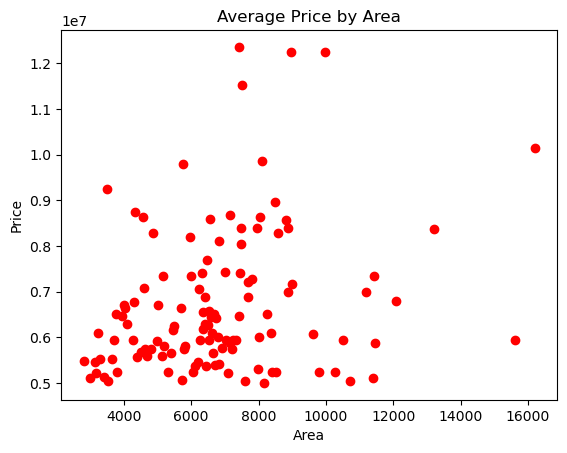

In [28]:
#Generate scatter plot between price and area of the greater than 5 million+ dollar homes
scatt_plot_exp_hsng = exp_ny_housing_df.groupby(["area"]).mean()["price"]
scatt_plot_exp_hsng = scatt_plot_exp_hsng.reset_index()
scatt_plot_exp_hsng

y_axis_val = scatt_plot_exp_hsng["price"]
x_axis_val = scatt_plot_exp_hsng["area"]

plt.scatter(x_axis_val,y_axis_val, color="red")
plt.title('Average Price by Area')
plt.ylabel('Price')
plt.xlabel('Area')

plt.show()

##  10. The area and price of NY homes have a positive correlation